In [1]:
import matplotlib.pyplot as plt
import numpy as np

from qiskit import IBMQ, Aer, QuantumCircuit, ClassicalRegister, execute
from qiskit.providers.ibmq import least_busy
from qiskit.quantum_info import Statevector

from qiskit.visualization import plot_histogram


In [2]:
n = 2
grover_circuit = QuantumCircuit(n);
def initialize_s(qc, qubits):
    for q in qubits:
        qc.h(q)
    return qc


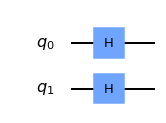

In [5]:
grover_circuit = initialize_s(grover_circuit, [0, 1])
grover_circuit.draw('mpl')

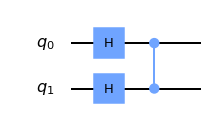

In [6]:
grover_circuit.cz(0,1)
grover_circuit.draw('mpl')

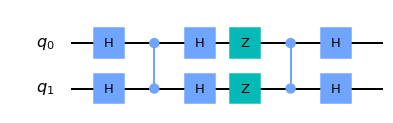

In [7]:
grover_circuit.h([0,1])
grover_circuit.z([0,1])
grover_circuit.cz(0,1)
grover_circuit.h([0,1])
grover_circuit.draw('mpl')

In [8]:
sv_sim = Aer.get_backend('statevector_simulator')
job_sim = execute(grover_circuit, sv_sim)
statevec = job_sim.result().get_statevector()
from qiskit_textbook.tools import vector2latex
vector2latex(statevec, pretext = "|\\psi\\rangle = ")

<IPython.core.display.Math object>

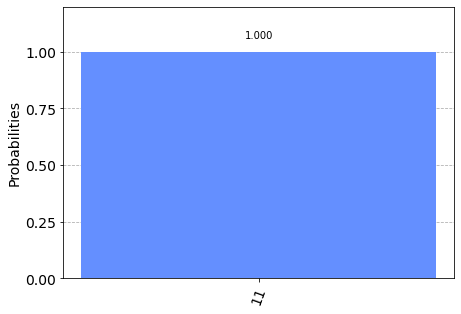

In [9]:
grover_circuit.measure_all()
qasm_simulator = Aer.get_backend('qasm_simulator')
shots = 1024
results = execute(grover_circuit, backend = qasm_simulator, shots = shots).result()
answer = results.get_counts()
plot_histogram(answer)

In [11]:
provider = IBMQ.load_account()
device = least_busy(provider.backends
    (filters = lambda x: 
     x.configuration().n_qubits >= 3 and not
     x.configuration().simulator and 
     x.status().operational == True))
print("Running on current least busy device: ", device)

ibmqfactory.load_account:WARNING:2020-10-11 02:04:17,375: Credentials are already in use. The existing account in the session will be replaced.


Running on current least busy device:  ibmq_athens


In [12]:
from qiskit.tools.monitor import job_monitor
job = execute(grover_circuit, backend = device, shots = 1024, optimization_level=3)
job_monitor(job, interval = 2)


Job Status: job has successfully run


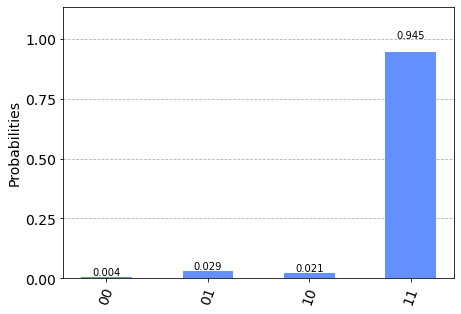

In [13]:
results = job.result()
answer = results.get_counts(grover_circuit)
plot_histogram(answer)

In [14]:
qc = QuantumCircuit(3)
qc.cz(0,2)
qc.cz(1,2)
oracle_ex3 = qc.to_gate()
oracle_ex3.name = "U$_\omega$"


In [15]:
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    for qubit in range(nqubits):
        qc.h(qubit)
    for qubit in range(nqubits):
        qc.x(qubit)
    
    qc.h(nqubits-1)
    qc.mct(list(range(nqubits-1)), nqubits-1)
    qc.h(nqubits-1)
    
    for qubit in range(nqubits):
        qc.x(qubit)
    
    for qubit in range(nqubits):
        qc.h(qubit)
    
    U_s = qc.to_gate()
    U_s.name = "$U_s$"
    return U_s

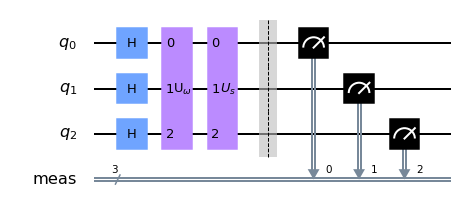

In [16]:
n = 3
grover_circuit = QuantumCircuit(n)
grover_circuit = initialize_s(grover_circuit, [0,1,2])
grover_circuit.append(oracle_ex3, [0,1,2])
grover_circuit.append(diffuser(n), [0,1,2])
grover_circuit.measure_all()
grover_circuit.draw('mpl')

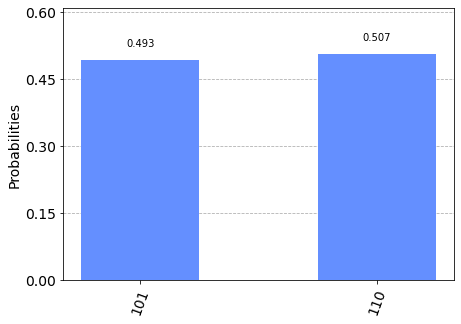

In [18]:
backend = Aer.get_backend('qasm_simulator')
results = execute(grover_circuit, backend = backend, shots=1024).result()
answer = results.get_counts()
plot_histogram(answer)


In [20]:
backend = least_busy(provider.backends
                     (filters = lambda x: 
                      x.configuration().n_qubits >= 3 and not
                      x.configuration().simulator and 
                      x.status().operational == True))
print("least busy backend: ", backend)

least busy backend:  ibmq_athens


In [21]:
from qiskit.tools.monitor import job_monitor
job = execute(grover_circuit, backend=backend, shots=1024, optimization_level=3)
job_monitor(job, interval=2)


Job Status: job has successfully run


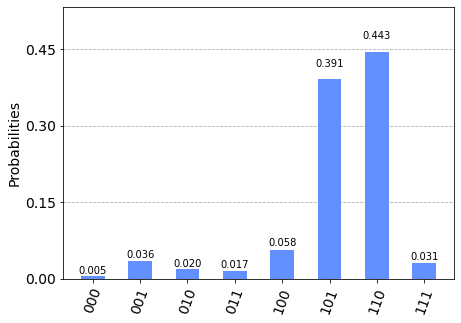

In [22]:
results = job.result()
answer = results.get_counts(grover_circuit)
plot_histogram(answer)

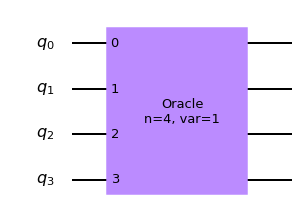

In [25]:
from qiskit_textbook.problems import grover_problem_oracle

n = 4
oracle = grover_problem_oracle(n, variant=1)
qc = QuantumCircuit(n)
qc.append(oracle,[0,1,2,3])
qc.draw('mpl')

[0, 1, 2, 3]


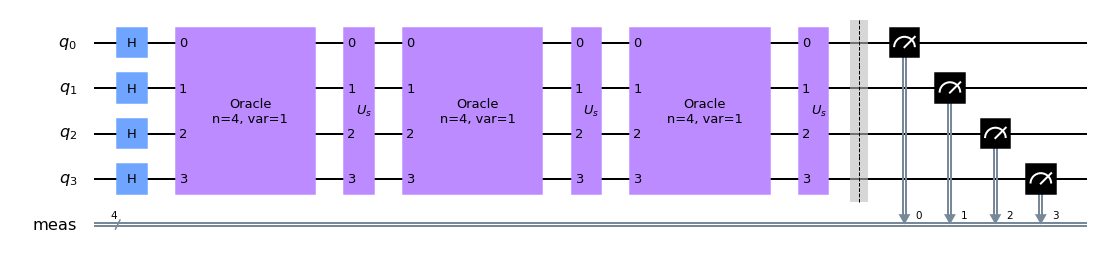

In [42]:
n = 4
oracle = grover_problem_oracle(n, variant=1)
qc = QuantumCircuit(n)
# do all H, that is initialize
for i in range(n):
    qc.h(i)
# for number of iterations
# try 3 for variant 1
# 4 for variant 2
r = list(range(n))
print(r)
for j in range(3):
    qc.append(oracle, r)
    qc.append(diffuser(n), r)
qc.measure_all()
qc.draw('mpl')


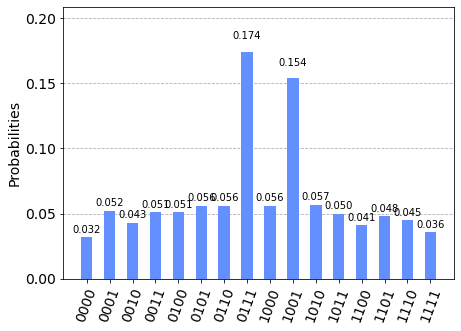

In [43]:
backend = Aer.get_backend('qasm_simulator')
results = execute(qc, backend=backend, shots = 1024).result()
answer = results.get_counts()
plot_histogram(answer)

[0, 1, 2, 3]


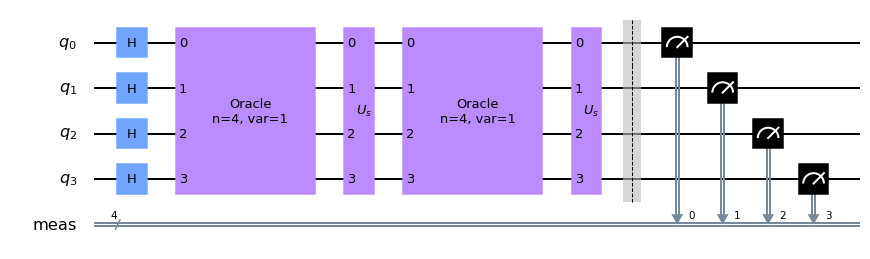

In [46]:
# ok so as we can see above for 3 iterations we get 0111 and 1001 cool
# try 2 iterations for variant 1
n = 4
oracle = grover_problem_oracle(n, variant=1)
qc = QuantumCircuit(n)
# do all H, that is initialize
for i in range(n):
    qc.h(i)
# for number of iterations
# try 2 for variant 1
# 4 for variant 2
r = list(range(n))
print(r)
for j in range(2):
    qc.append(oracle, r)
    qc.append(diffuser(n), r)
qc.measure_all()
qc.draw('mpl')


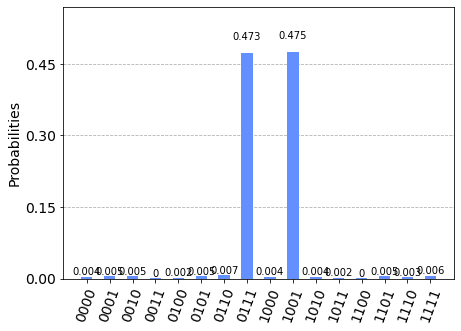

In [47]:
backend = Aer.get_backend('qasm_simulator')
results = execute(qc, backend=backend, shots = 1024).result()
answer = results.get_counts()
plot_histogram(answer)

In [37]:
# somewhat uniexpected sqrt(8) is closer to 3 than 2 
# sqrt(16/2) N = 16, M = 2, so idk
# why two iterations are ideal for this problem?
# i mean i could check arrows, but intuitively from this
# sqrt thing i can't see
# now 1b: if we apply more iterationse we get worse results
# as the arrow rotates past our vector that we want

[0, 1, 2, 3]


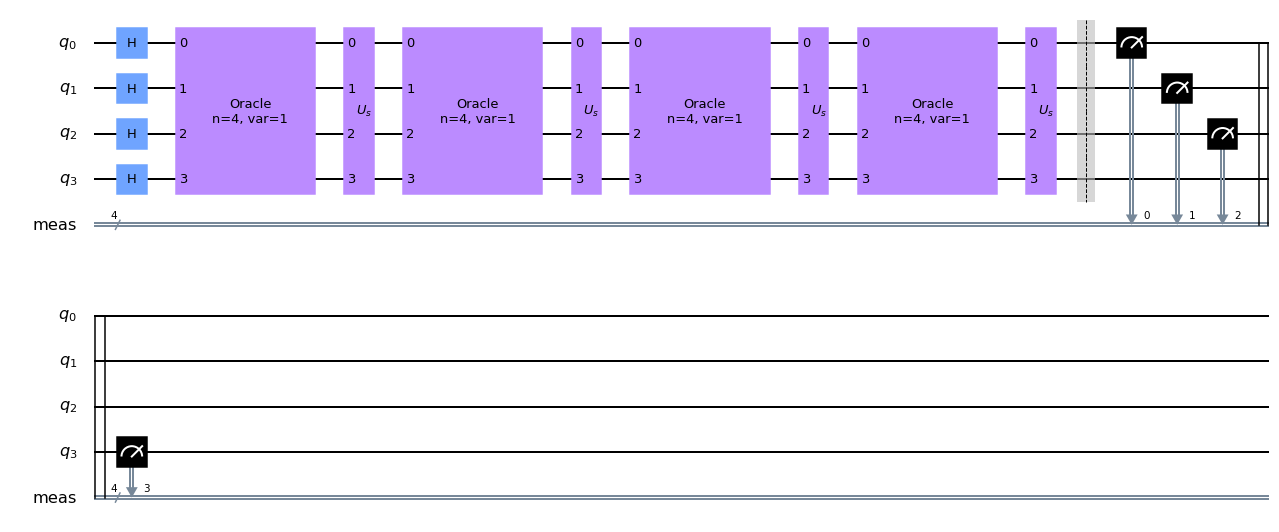

In [49]:
# ok so as we can see above for 2 iterations we get 0111 and 1001 cool
# try 4 iterations for variant 1
n = 4
oracle = grover_problem_oracle(n, variant=1)
qc = QuantumCircuit(n)
# do all H, that is initialize
for i in range(n):
    qc.h(i)
# for number of iterations
# try 2 for variant 1
# 4 for variant 2
r = list(range(n))
print(r)
for j in range(4):
    qc.append(oracle, r)
    qc.append(diffuser(n), r)
qc.measure_all()
qc.draw('mpl')


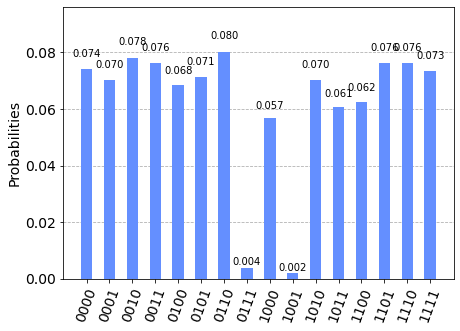

In [50]:
backend = Aer.get_backend('qasm_simulator')
results = execute(qc, backend=backend, shots = 1024).result()
answer = results.get_counts()
plot_histogram(answer)

In [51]:
# oh it is really bad lul

[0, 1, 2, 3]


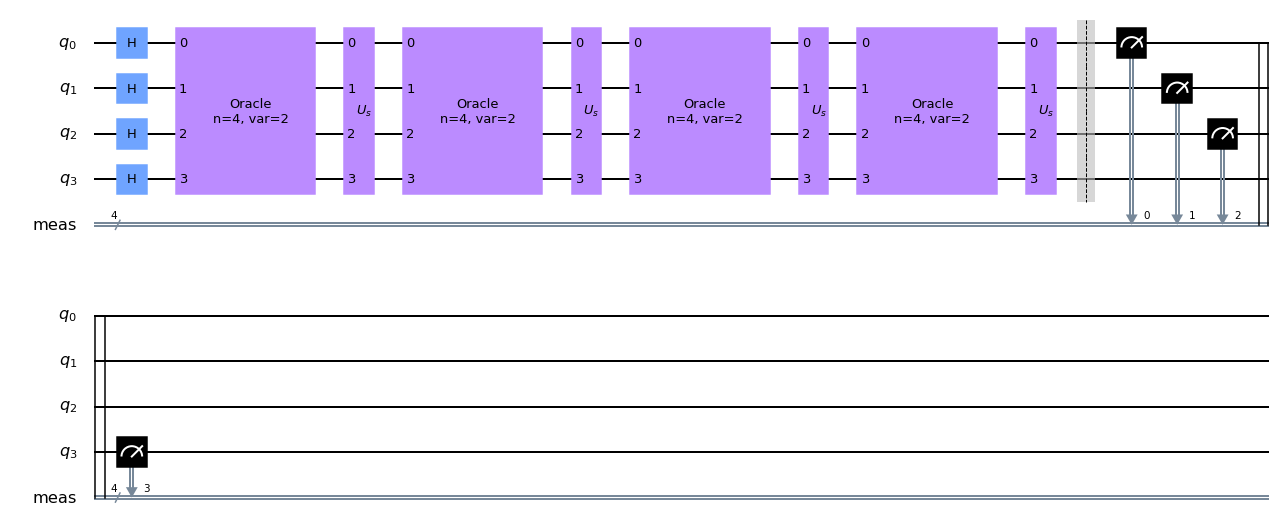

In [54]:
# gotta go back to variant 2
n = 4
oracle = grover_problem_oracle(n, variant=2)
qc = QuantumCircuit(n)
# do all H, that is initialize
for i in range(n):
    qc.h(i)
# 4 for variant 2
r = list(range(n))
print(r)
for j in range(4):
    qc.append(oracle, r)
    qc.append(diffuser(n), r)
qc.measure_all()
qc.draw('mpl')


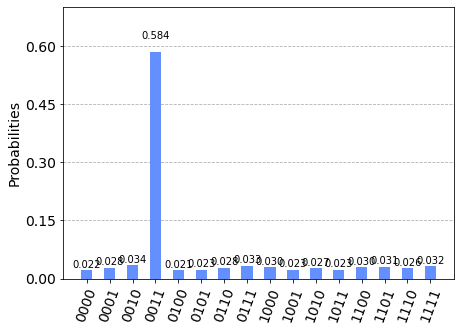

In [55]:
backend = Aer.get_backend('qasm_simulator')
results = execute(qc, backend=backend, shots = 1024).result()
answer = results.get_counts()
plot_histogram(answer)

[0, 1, 2, 3]


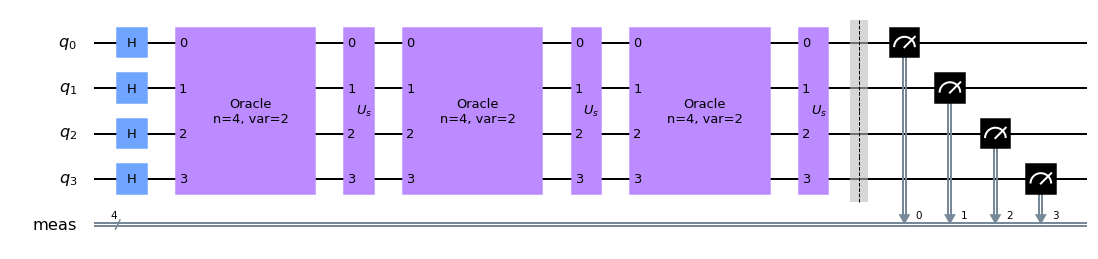

In [56]:
# hmm doesn't look ideal
# maybe try 3
# gotta go back to variant 2
n = 4
oracle = grover_problem_oracle(n, variant=2)
qc = QuantumCircuit(n)
# do all H, that is initialize
for i in range(n):
    qc.h(i)
# try 3 for variant 2
r = list(range(n))
print(r)
for j in range(3):
    qc.append(oracle, r)
    qc.append(diffuser(n), r)
qc.measure_all()
qc.draw('mpl')


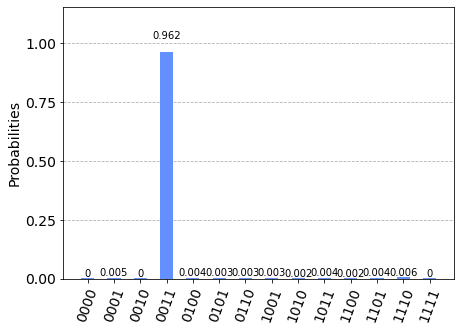

In [57]:
backend = Aer.get_backend('qasm_simulator')
results = execute(qc, backend=backend, shots = 1024).result()
answer = results.get_counts()
plot_histogram(answer)

In [58]:
# i have no idea why 3 is ok
# maybe not exaclty sqrt(N) operations , more like sqrt(N) - 1?
# that would make more sense, or so
# well it moves by 2*theta every time 
# but it starts at theta
# so by K operations we would end up at (K*2*theta + theta) 
# and it needs to be 90 degrees xD (2*K+1)*theta = 90
# yeah no clue :)


[0, 1, 2, 3]


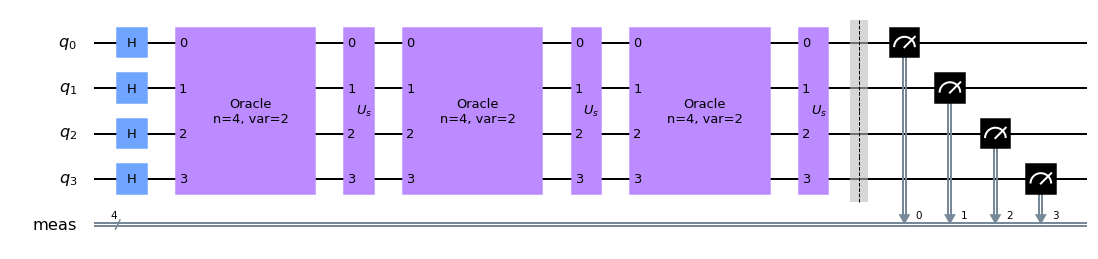

In [62]:
def grover_solver(oracle, iterations):

    n = len(oracle) # not familiar with python here
    qc = QuantumCircuit(n)
    # do all H, that is initialize
    for i in range(n):
        qc.h(i)
    r = list(range(n))
    print(r)
    for j in range(3):
        qc.append(oracle, r)
        qc.append(diffuser(n), r)
    qc.measure_all()
    return qc
n = 4
qc = grover_solver(grover_problem_oracle(n,variant=2), 3)
qc.draw('mpl')

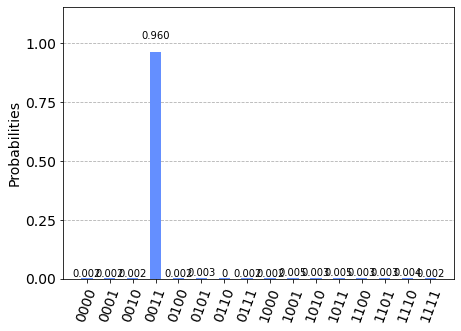

In [63]:
backend = Aer.get_backend('qasm_simulator')
results = execute(qc, backend=backend, shots = 1024).result()
answer = results.get_counts()
plot_histogram(answer)

In [64]:
# ok seems to work

In [65]:
clause_list = [[0,1],
              [0,2],
              [1,3],
              [2,3]]
def XOR(qc, a, b, output):
    qc.cx(a, output)
    qc.cx(b, output)


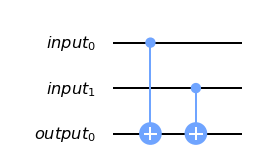

In [70]:
from qiskit import QuantumRegister

in_qubits = QuantumRegister(2, name = 'input')
out_qubit = QuantumRegister(1, name = 'output')
qc = QuantumCircuit(in_qubits, out_qubit)
XOR(qc, in_qubits[0], in_qubits[1], out_qubit)
qc.draw('mpl')

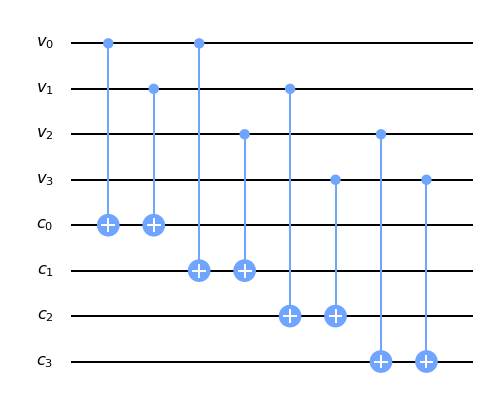

In [73]:
var_qubits = QuantumRegister(4, name = 'v')
clause_qubits = QuantumRegister(4, name = 'c')

qc = QuantumCircuit(var_qubits, clause_qubits)

i = 0
for clause in clause_list:
    XOR(qc, clause[0], clause[1], clause_qubits[i])
    i += 1

qc.draw('mpl')

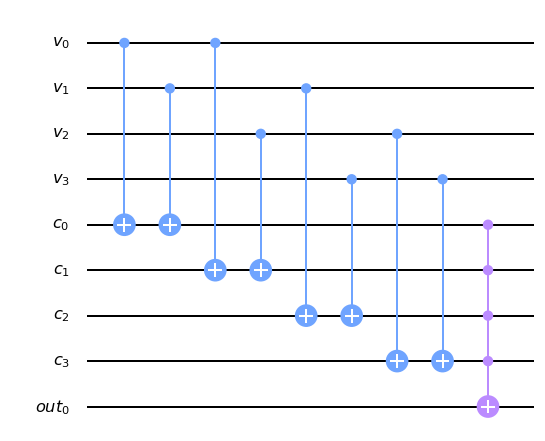

In [75]:
var_qubits = QuantumRegister(4, name = 'v')
clause_qubits = QuantumRegister(4, name = 'c')
output_qubit = QuantumRegister(1, name = 'out')
qc = QuantumCircuit(var_qubits, clause_qubits, output_qubit)

i = 0
for clause in clause_list:
    XOR(qc, clause[0], clause[1], clause_qubits[i])
    i += 1

qc.mct(clause_qubits, output_qubit)

qc.draw('mpl')

In [79]:
var_qubits = QuantumRegister(4, name = 'v')
clause_qubits = QuantumRegister(4, name = 'c')
output_qubit = QuantumRegister(1, name = 'out')
cbits = ClassicalRegister(4, name = 'cbits')
qc = QuantumCircuit(var_qubits, clause_qubits, output_qubit, cbits)


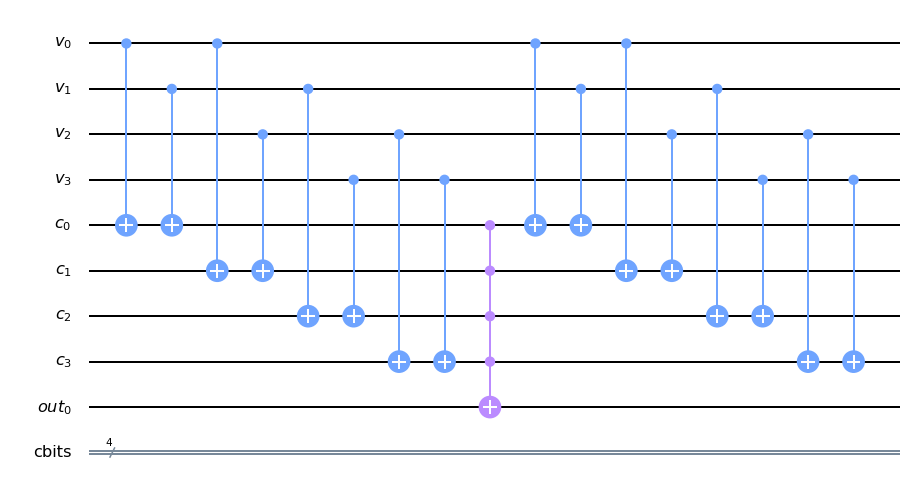

In [80]:
def sudoku_oracle(qc, clause_list, var_qubits, clause_qubits, cbits):
    
    i = 0
    for clause in clause_list:
        XOR(qc, clause[0], clause[1], clause_qubits[i])
        i += 1
    
    qc.mct(clause_qubits, output_qubit)
    
    i = 0
    for clause in clause_list:
        XOR(qc, clause[0], clause[1], clause_qubits[i])
        i += 1

sudoku_oracle(qc, clause_list, var_qubits, clause_qubits, cbits)
qc.draw('mpl')

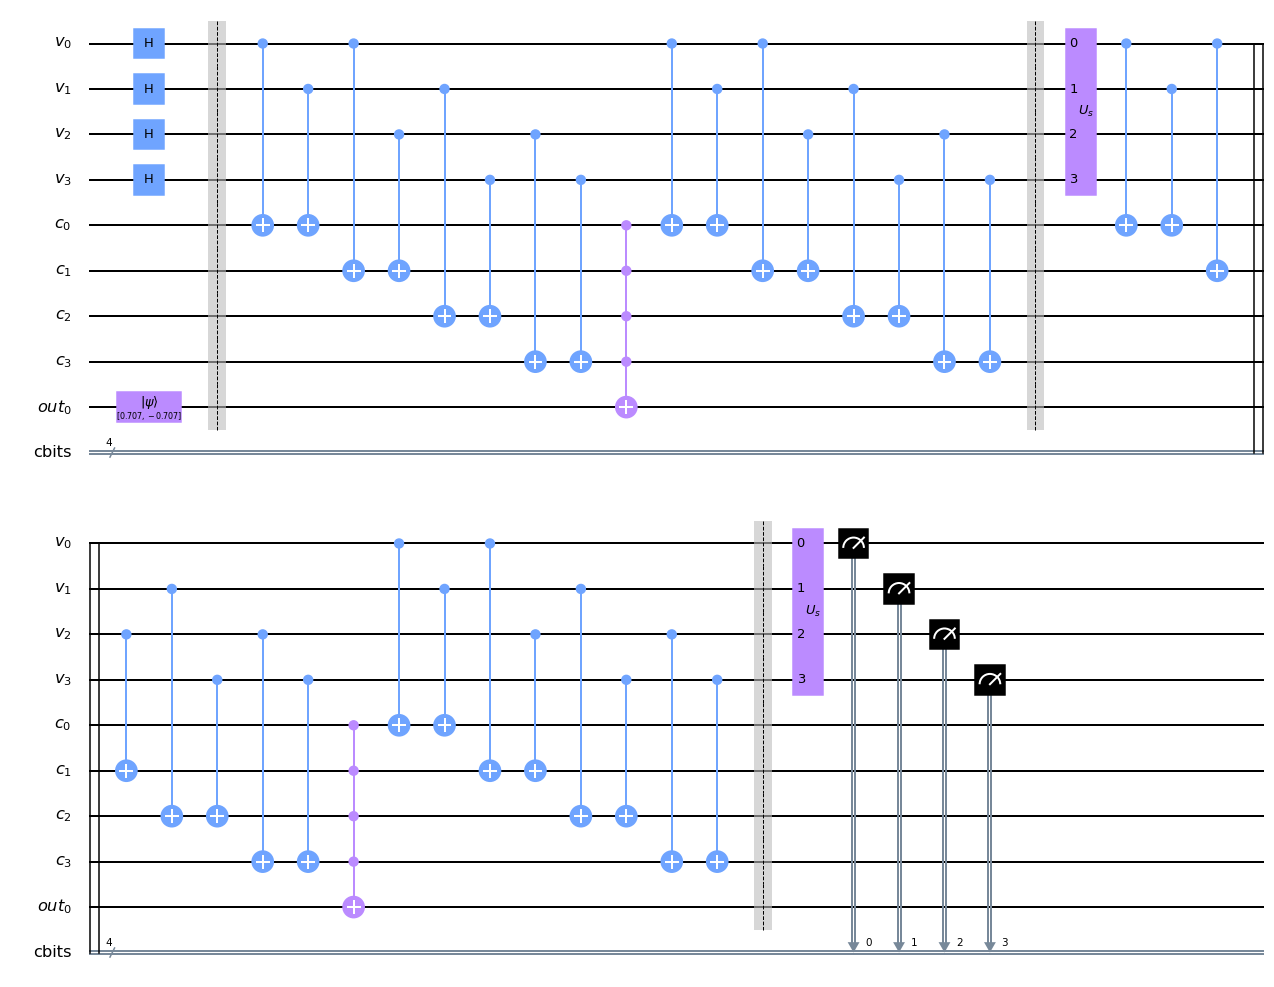

In [83]:
var_qubits = QuantumRegister(4, name = 'v')
clause_qubits = QuantumRegister(4, name = 'c')
output_qubit = QuantumRegister(1, name = 'out')
cbits = ClassicalRegister(4, name = 'cbits')
qc = QuantumCircuit(var_qubits, clause_qubits, output_qubit, cbits)

qc.initialize([1, -1] / np.sqrt(2), output_qubit)

qc.h(var_qubits)
qc.barrier()

sudoku_oracle(qc, clause_list, var_qubits, clause_qubits, cbits)
qc.barrier()
qc.append(diffuser(4), [0,1,2,3])

sudoku_oracle(qc, clause_list, var_qubits, clause_qubits, cbits)
qc.barrier()
qc.append(diffuser(4), [0,1,2,3])

qc.measure(var_qubits, cbits)
qc.draw('mpl')

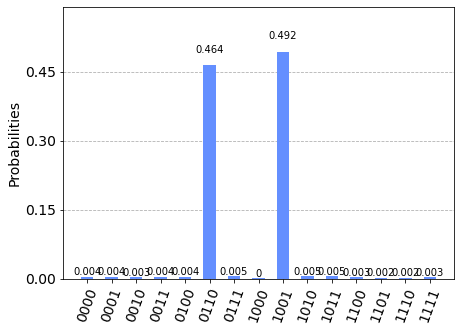

In [84]:
sim = Aer.get_backend('qasm_simulator')
result = execute(qc, backend = sim, shots = 1024).result()
plot_histogram(result.get_counts())